<a href="https://colab.research.google.com/github/Pushpit07/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install pandas==1.1.0
import pandas as pd

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [7]:
clean_data = data.drop(cols_to_drop, axis=1)

In [8]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
clean_data['Sex'] = le.fit_transform(clean_data['Sex'])

In [12]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [14]:
clean_data = clean_data.fillna(clean_data['Age'].mean())

In [15]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [16]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols = ['Survived']

X = clean_data[input_cols]
y = clean_data[output_cols]

X.shape, y.shape

((891, 6), (891, 1))

# Entropy

In [17]:
def entropy(col):
  data, counts = np.unique(col, return_counts=True)
  N = float(col.shape[0])

  ent = 0.0

  for count in counts:
    p = count/N
    ent += p * np.log2(p)

  return -ent

In [18]:
col = np.array([2,2,4,4,3,3])
entropy(col)

1.584962500721156

# Information gain

In [19]:
def divide_data(x_data, fkey, fval):
  x_right = pd.DataFrame([], columns=x_data.coulmns)
  x_left = pd.DataFrame([], columns=x_data.coulmns)

  for xi in range(x_data.shape[0]):
    val = x_data[fkey].iloc[xi]
    if val > fval:
      x_right = x_right.append(x_data.loc[xi])
    else:
      x_left = x_left.append(x_data.loc[xi])

  return x_left, x_right

In [20]:
def information_gain(x_data, fkey, fval):
  left, right = divide_data(x_data, fkey, fval)

  # % of examples in left and right
  l = float(left.shape[0]) / x_data.shape[0]
  r = float(right.shape[0]) / x_data.shape[0]

  hs = entropy(x_data.Survived)

  igain = hs - (l * entropy(left.Survived) + r * entropy(right.Survived))
  return igain

In [21]:
for f in X.columns:
  print(f)
  print(information_gain(clean_data, f, clean_data[f].mean()))

Pclass


AttributeError: ignored

# Decision Tree

In [22]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [23]:
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [25]:
sk_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
sk_tree.score(X_test, y_test)

0.8067796610169492

In [27]:
sk_tree.predict(X_test[:10])

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [28]:
y_test[:10]

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


# Custom Implementation

In [29]:
class DecisionTree:
    
    def __init__(self, depth=0, max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None # what i'm going to predict at a particular Node, say leaf node has 50 examples (40 Y and 10 N), 
                           # then target of this leaf node is Y (80% accuracy)
        
    def fit(self, X_train):
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train, ix, X_train[ix].mean())
            info_gains.append(i_gain)

        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        # print("Making tree feature is ", self.fkey)
        
        # split data
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        # reset_index will reset the index again from starting for each subpart
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # Base Cases:
        # 1. reached leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
                
        # 2. stop early when depth >= max_depth
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
    
        # Recursion
        self.left = DecisionTree(depth=self.depth + 1)
        self.left.fit(data_left)
        
        self.right = DecisionTree(depth=self.depth + 1)
        self.right.fit(data_right)
        
        # You can set target at every node and not just leaf node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
        return
    
    def predict(self, test):
        if test[self.fkey] > self.fval:
            # go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [30]:
dt = DecisionTree()

In [31]:
split = int(0.7*clean_data.shape[0])
train_data = clean_data[:split]
test_data = clean_data[split:]
test_data = test_data.reset_index(drop=True)

In [32]:
dt.fit(train_data)

AttributeError: ignored

In [ ]:
y_pred = []
for i in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[i]))

In [33]:
y_pred[:10]

NameError: ignored

In [34]:
y_actual = test_data[output_cols]

In [35]:
data[split:][:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C


# Visualising DT

In [36]:
import pydotplus
from sklearn.externals.six import StringIO # data format
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


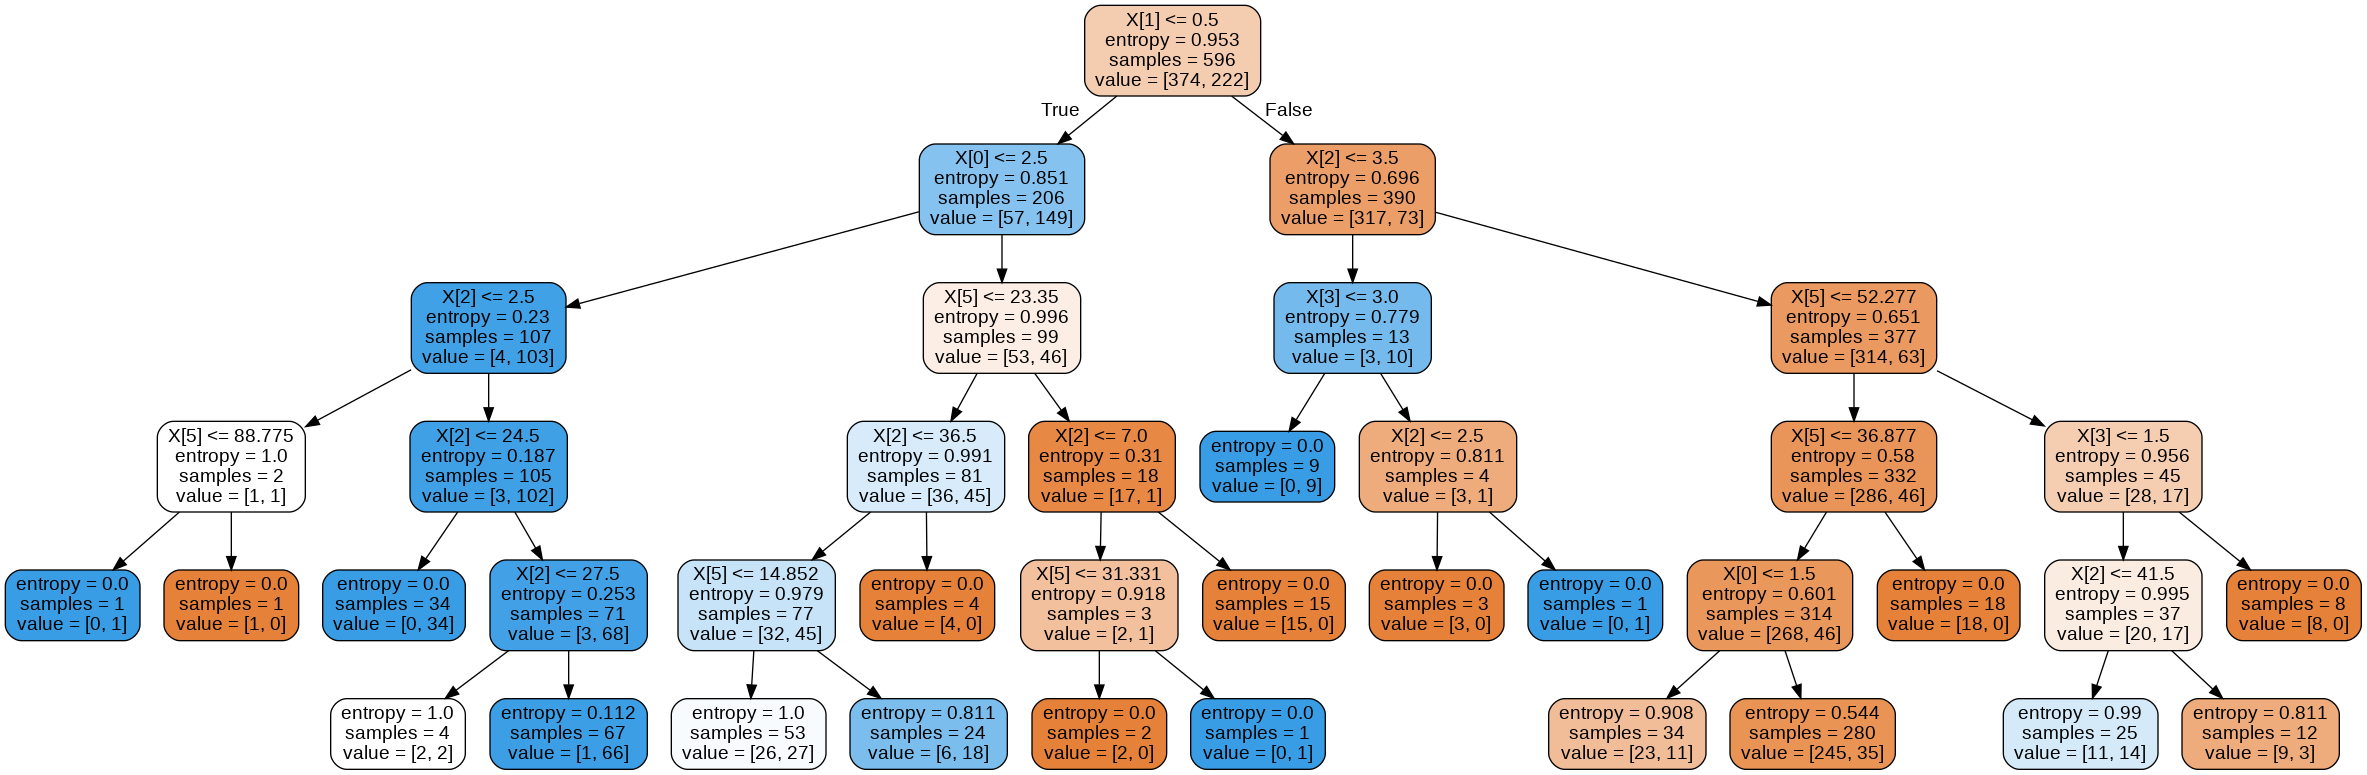

In [ ]:
dot_data = StringIO()
export_graphviz(sk_tree, out_file=dot_data, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())